In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

Setup the 2006 dataframe

In [2]:
six = pd.read_table("NSDUH_2006_Tab.tsv",sep='\t', header = 0, index_col = 0, low_memory=False)

In [3]:
len(six)

55035

Create the 2006 Class Variable

In [4]:
#six["COMB"] = (
#    six["PROCODNP"]
#    +six["OXYCODP2"]
#    +six["HYDCODOP"]
#    +six["TRAMADP"])
six["CLASS"] = 0
#six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

In [7]:
six["ANALWT_C"].count()

55035

In [5]:
six["ANALWT_C"].sum()

246021655.73427114

In [8]:
six.loc[(six["CATAG3"]==4)]["ANALWT_C"].count()

7665

In [6]:
six.loc[(six["CATAG3"]==4)]["ANALWT_C"].sum()

64766177.30882517

In [9]:
six.loc[(six["CATAG3"]==4)&(six["CLASS"]==1)]["ANALWT_C"].count()

34

In [30]:
six.loc[(six["CATAG3"]==4)&(six["CLASS"]==1)]["ANALWT_C"].sum()

273940.197175

Select the fields to study 2006 current co-incident drug use

In [31]:
drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","ANALWT_C","CLASS"]

Select the fields to study 2006 Demographic effects

In [32]:
six_otherdrug = six.loc[six["CATAG3"]==4,drug_use2006]

In [33]:
six_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALYR,INHYR,TRQYR,STMYR,MTHYR,SEDYR,ANALWT_C,CLASS
QUESTID2,,,,,,,,,,,,,
76775602,0,0,0,0,0,0,0,0,0,0,0,8775.542155,0
79748602,0,1,0,0,0,0,0,0,0,0,0,3689.878982,0
66270602,0,1,0,0,0,0,0,0,0,0,0,10564.457445,0
32480602,1,1,0,0,0,0,0,0,0,0,0,842.505686,0
40722602,1,1,0,0,0,0,0,0,0,0,0,20025.688680,0


2021 - setup data frame, create CLASS variable, select certain fields for certain studies

In [34]:
tw1 = pd.read_table(
    "NSDUH_2021_Tab.txt",
    sep='\t', 
    header = 0, 
    index_col = 0, 
    low_memory=False)

In [35]:
tw1["CLASS"] = tw1["OPINMYR"]

In [36]:
tw1["ANALWT_C"].count()

58034

In [37]:
tw1["ANALWT_C"].sum()

279843943.5445435

In [38]:
tw1.loc[(tw1["CATAG3"]==4)]["ANALWT_C"].count()

12561

In [39]:
tw1.loc[(tw1["CATAG3"]==4)]["ANALWT_C"].sum()

62187799.67613914

In [40]:
tw1.loc[(tw1["CATAG3"]==4)&(tw1["CLASS"]==1)]["ANALWT_C"].count()

517

In [41]:
tw1.loc[(tw1["CATAG3"]==4)&(tw1["CLASS"]==1)]["ANALWT_C"].sum()

2378583.138454185

In [42]:

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","ANALWT_C","CLASS"]

In [43]:
tw1_otherdrug = tw1.loc[tw1["CATAG3"]==4,drug_use2021]

In [45]:
tw1_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,METHAMYR,SEDANYYR,ANALWT_C,CLASS
QUESTID2,,,,,,,,,,,,,
10002722,1,0,1,0,0,0,0,0,0,0,0,11275.260484,0
10004796,0,1,0,0,0,0,0,0,1,0,0,382.287416,0
10007045,0,1,0,0,0,0,0,1,0,0,0,10666.497630,0
10008166,0,1,0,0,0,0,0,0,0,0,0,288.384924,0
10009495,0,1,0,0,0,0,0,0,0,0,1,2969.677651,0


ANALYSIS OF 2006 DATA

In [76]:
six_pop_size = six_otherdrug["ANALWT_C"].sum()

In [77]:
six_opium_user = six_otherdrug.loc[six_otherdrug["CLASS"]==1]["ANALWT_C"].sum()

In [78]:
pct_drug_coinc_2006 = [
    six_otherdrug.loc[(six_otherdrug["CLASS"]==1) & (six_otherdrug[x]==1)]["ANALWT_C"].sum()/six_opium_user 
    for x in drug_use2006[0:11]]

In [79]:
drug_use2006_nowt = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

pct_druguse_overall_2006 = [
    six_otherdrug.loc[(six_otherdrug[x]==1)]["ANALWT_C"].sum()/six_pop_size 
    for x in drug_use2006_nowt]

Analysis of 2021 Data

In [80]:
tw1_pop_size = tw1_otherdrug["ANALWT_C"].sum() 

In [81]:
tw1_opium_user = tw1_otherdrug.loc[tw1_otherdrug["CLASS"]==1]["ANALWT_C"].sum()

In [82]:
pct_drug_coinc_2021 = [
    tw1_otherdrug.loc[(tw1_otherdrug["CLASS"]==1) & (tw1_otherdrug[x]==1)]["ANALWT_C"].sum()/tw1_opium_user 
    for x in drug_use2021[0:11]]

In [83]:
drug_use2021_nowt = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

pct_druguse_overall_2021 = [
    tw1_otherdrug.loc[(tw1_otherdrug[x]==1)]["ANALWT_C"].sum()/tw1_pop_size 
    for x in drug_use2021_nowt]

Visualizing change of usage rates between 2006 to 2021

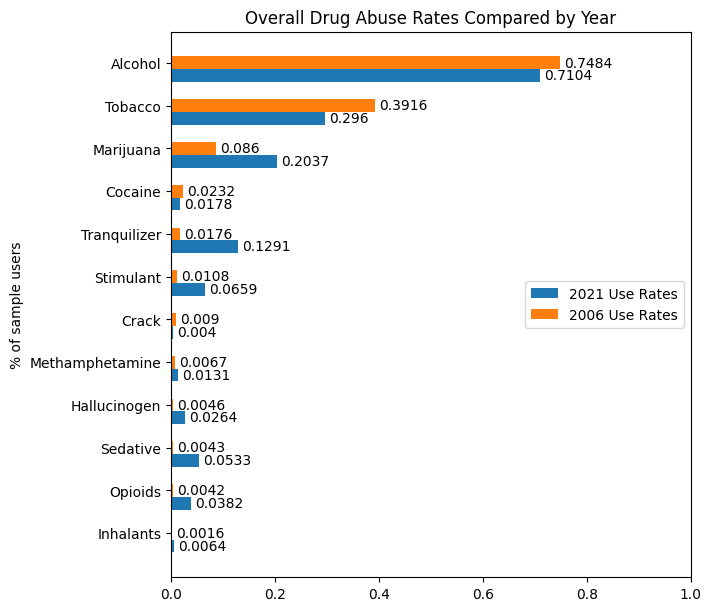

In [84]:
drug_class = ("Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative","Opioids")

drug_class_sorted = list(np.array(drug_class)[np.argsort(pct_druguse_overall_2006)])
use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_druguse_overall_2021)[np.argsort(pct_druguse_overall_2006)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_druguse_overall_2006)[np.argsort(pct_druguse_overall_2006)],4)),
}

x = np.arange(len(drug_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Overall Drug Abuse Rates Compared by Year')
ax.set_yticks(x + width, drug_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

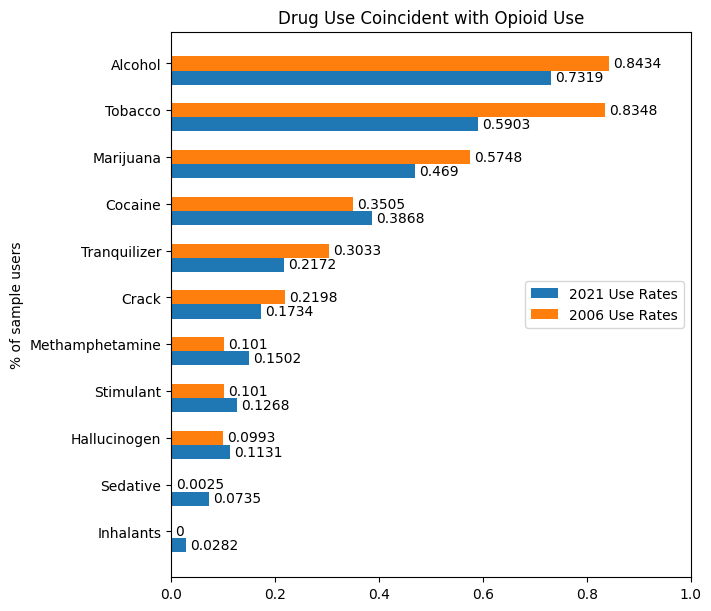

In [459]:


opioid_comp_class = ["Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative"]

opioid_comp_class_sorted = list(np.array(opioid_comp_class)[np.argsort(pct_drug_coinc_2006)])

use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_drug_coinc_2021)[np.argsort(pct_drug_coinc_2021)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_drug_coinc_2006)[np.argsort(pct_drug_coinc_2006)],4)),
}

x = np.arange(len(opioid_comp_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Drug Use Coincident with Opioid Use')
ax.set_yticks(x + width, opioid_comp_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

DEMOGRAPHIC DATA EXPLORATION

In [87]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','ANALWT_C','CLASS']

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','ANALWT_C','CLASS']

In [88]:
six_demo = six.loc[six["CATAG3"]==4,demo2006]
tw1_demo = tw1.loc[tw1["CATAG3"]==4,demo2021]

In [89]:
six_demo['ANALWT_C'].sum()

64766177.30882517

In [90]:
tw1_demo['ANALWT_C'].sum()

62187799.67613914

In [95]:
six_user_len = six_demo.loc[six_demo["CLASS"]==1]['ANALWT_C'].sum()
six_user_len

273940.197175

In [96]:
tw1_user_len = tw1_demo.loc[tw1_demo["CLASS"]==1]['ANALWT_C'].sum()
tw1_user_len

2378583.138454185

IN-PATIENT MENTAL HEALTH TREATMENT

In [106]:
six_received_trtmnt = six_demo.loc[(six_demo["CLASS"]==1)&(six_demo["AMHINP2"]==1)]["ANALWT_C"].sum()
tw1_received_trtmnt = tw1_demo.loc[(tw1_demo["CLASS"]==1)&(tw1_demo["AMHINP2"]==1)]["ANALWT_C"].sum()

#six_treat_count = six_demo.loc[(six_demo["CLASS"]==1),["ANALWT_C"]].sum()
#tw1_treat_count = tw1_demo.loc[(tw1_demo["CLASS"]==1),["ANALWT_C"]].sum()
#six_treat = six_demo.loc[(six_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/six_user_len
#tw1_treat = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/tw1_treat_count

In [108]:
d = {2006:six_received_trtmnt/six_user_len, 2021:tw1_received_trtmnt/tw1_user_len}
treat = pd.DataFrame(data=d,index=['yes'])

<Axes: title={'center': 'PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR'}>

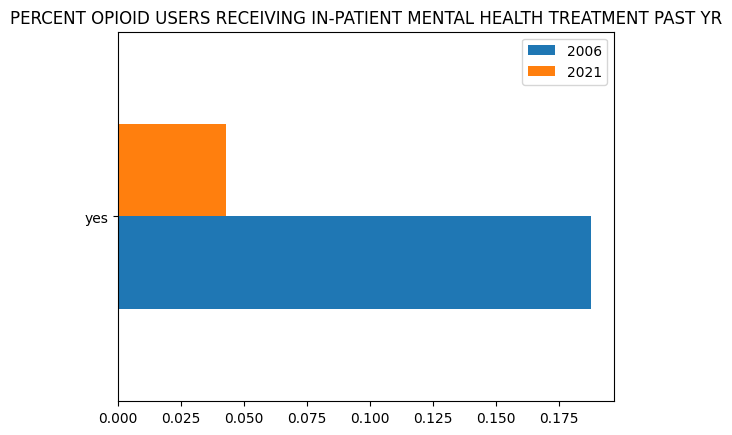

In [109]:
treat.plot.barh(title="PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR")

SEVERE PSYCHOLOGICAL DISTRESS

In [47]:
six_psych = six_demo.loc[(six_demo["CLASS"]==1),["SPDYRADJ"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_psych = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SPDPSTYR"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [48]:
d = {2006:[x for x in six_psych],2021:[x for x in tw1_psych]}
psych = pd.DataFrame(data=d,index=["No","Yes"])

<Axes: title={'center': 'PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR'}>

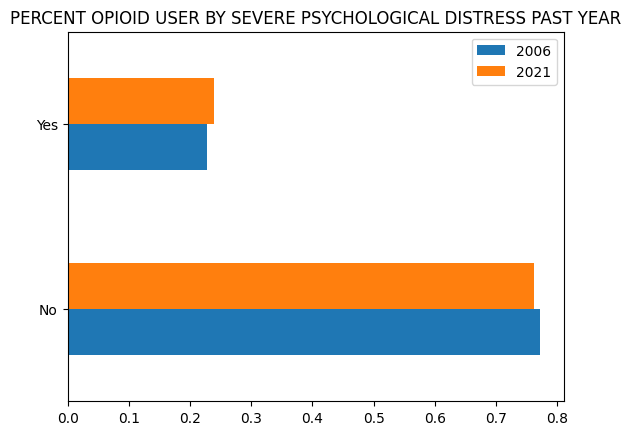

In [49]:
psych.plot.barh(title="PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR")

MAJOR DEPRESSIVE EPISODE

In [50]:
six_depress = six_demo.loc[(six_demo["CLASS"]==1),["AJAMDEYR"]].value_counts().sort_index()/six_user_len
tw1_depress = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRAMDEYR"]].value_counts().sort_index()/tw1_user_len

In [51]:
d = {2006:[x for x in six_depress],2021:[x for x in tw1_depress]}
depress = pd.DataFrame(data=d,index=["No","Yes"])

In [52]:
depress

,2006,2021
No,0.176301,0.857012
Yes,0.812139,0.142988


<Axes: title={'center': 'PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR'}>

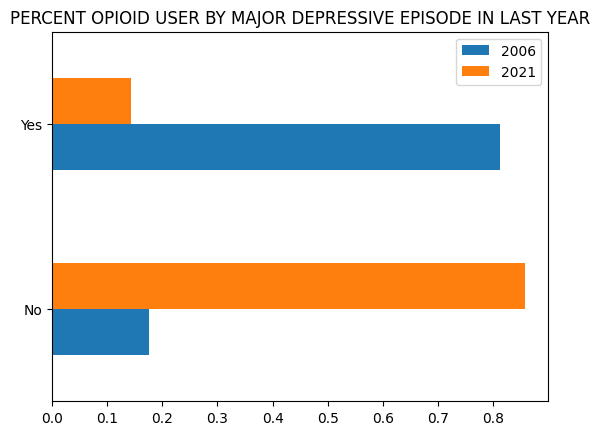

In [53]:
depress.plot.barh(title="PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR")

MARITAL STATUS

In [54]:
six_married = six_demo.loc[(six_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_married = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [55]:
d = {2006:[x for x in six_married],2021:[x for x in tw1_married]}
married = pd.DataFrame(data=d,index=["Married","Widowed","Divorced/Separated","Never Married"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY MARITAL STATUS'}>

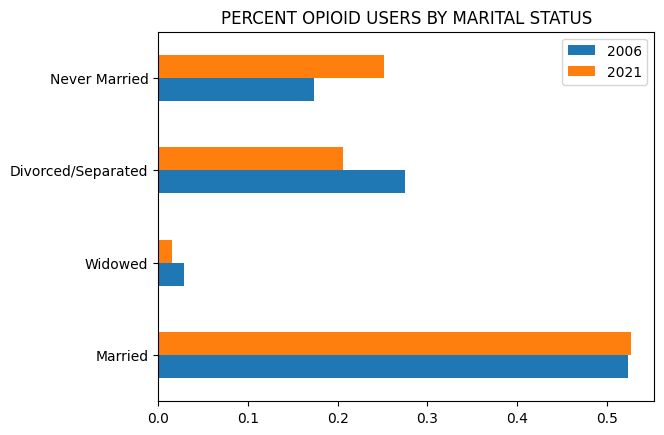

In [56]:
married.plot.barh(title="PERCENT OPIOID USERS BY MARITAL STATUS")

OVERALL HEALTH CONDITION

In [57]:
six_health = six_demo.loc[(six_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/six_user_len
tw1_health = tw1_demo.loc[(tw1_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/tw1_user_len

In [58]:
d = {2006:[x for x in six_health],2021:[x for x in tw1_health]}
health = pd.DataFrame(data=d,index=["Excellent","Very Good","Good","Fair/Poor"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL'}>

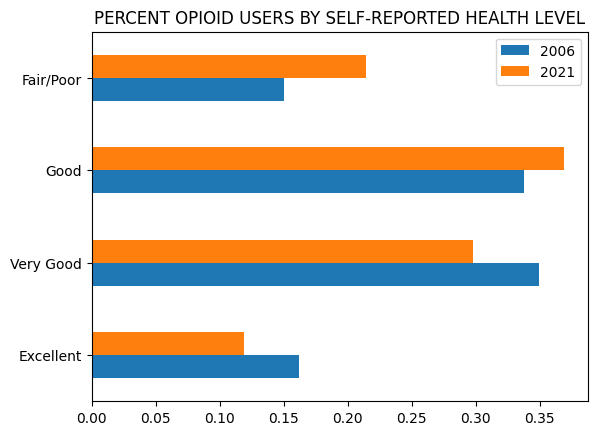

In [59]:
health.plot.barh(title="PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL")

EMPLOYMENT

In [60]:
six_employment = six_demo.loc[(six_demo["CLASS"]==1),["EMPSTATY"]].value_counts().sort_index()/six_user_len
tw1_employment = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRWRKSTAT"]].value_counts().sort_index()/tw1_user_len

In [61]:
d = {2006:[x for x in six_employment],2021:[x for x in tw1_employment]}
employment = pd.DataFrame(data=d,index=["FULL TIME","PART TIME","UNEMPLOYED","OTHER"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EMPLOYMENT STATUS'}>

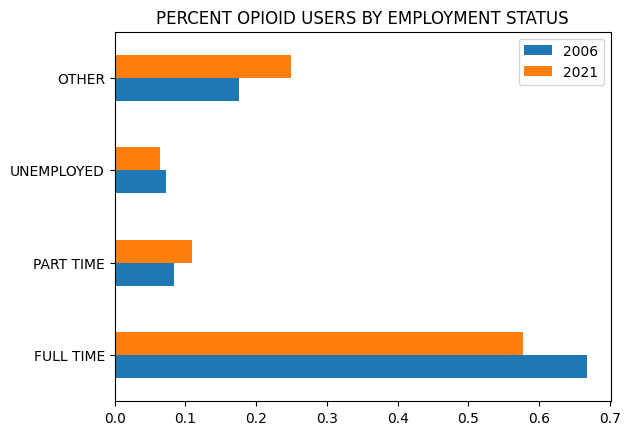

In [62]:
employment.plot.barh(title="PERCENT OPIOID USERS BY EMPLOYMENT STATUS")

EDUCATION

In [270]:
#six_educate = six_demo.loc[(six_demo["CLASS"]==1),["EDUCCAT2"]].value_counts().sort_index()/six_user_len
#tw1_educate = tw1_demo.loc[(tw1_demo["CLASS"]==1),["EDUHIGHCAT"]].value_counts().sort_index()/tw1_user_len

six_educate = list(six_demo.loc[(six_demo["CLASS"]==1)].groupby("EDUCCAT2").sum()["ANALWT_C"]/six_user_len)
tw1_educate = list(tw1_demo.loc[(tw1_demo["CLASS"]==1)].groupby("EDUHIGHCAT").sum()["ANALWT_C"]/tw1_user_len)

In [271]:
d = {2006:[x for x in six_educate],2021:[x for x in tw1_educate]}
educate = pd.DataFrame(data=d,index=["SOME HS","HS GRAD","SOME COLLEGE","COLLEGE GRAD"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EDUCATION LEVEL'}>

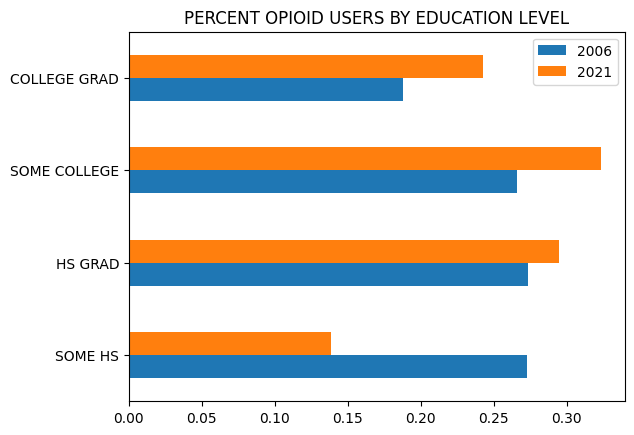

In [272]:
educate.plot.barh(title="PERCENT OPIOID USERS BY EDUCATION LEVEL")

GENDER AND RACE

In [127]:
six_sexrace = list(six_demo.loc[(six_demo["CLASS"]==1)].groupby("SEXRACE").sum()["ANALWT_C"]/six_user_len)
tw1_sexrace = list(tw1_demo.loc[(tw1_demo["CLASS"]==1)].groupby("SEXRACE").sum()["ANALWT_C"]/tw1_user_len)


In [128]:
while len(six_sexrace)<7:
    six_sexrace.append(0)

In [135]:
d = {2006:[x for x in six_sexrace],2021:[x for x in tw1_sexrace]}
sexrace = pd.DataFrame(data=d,index=["White Male",
                                     "White Female",
                                     "Black Male",
                                     "Black Female",
                                     "Hispanic Male",
                                     "Hispanic Female",
                                     "Other"])

<Axes: title={'center': 'RACE/GENDER DISTRIBUTION OF OPIOID USERS'}>

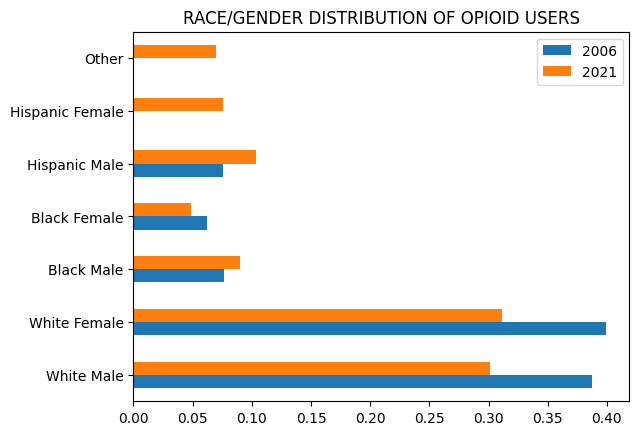

In [137]:
sexrace.plot.barh(title="RACE/GENDER DISTRIBUTION OF OPIOID USERS")

POVERTY

In [69]:
six_poverty = six_demo.loc[(six_demo["CLASS"]==1),["POVERTY2"]].value_counts().sort_index()/six_user_len
tw1_poverty = tw1_demo.loc[(tw1_demo["CLASS"]==1),["POVERTY3"]].value_counts().sort_index()/tw1_user_len

In [70]:
d = {2006:[x for x in six_poverty],2021:[x for x in tw1_poverty]}
poverty = pd.DataFrame(data=d,index=["Poverty","2xPoverty",">2xPoverty"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY POVERTY LEVEL'}>

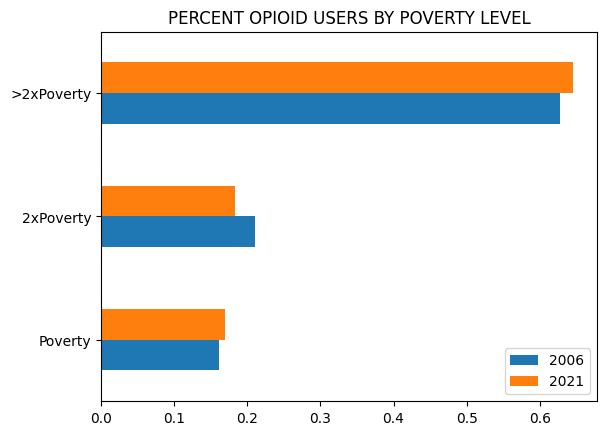

In [71]:
poverty.plot.barh(title="PERCENT OPIOID USERS BY POVERTY LEVEL")

GENDER

In [72]:
six_gender = six_demo.loc[(six_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/six_user_len
tw1_gender = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/tw1_user_len

In [73]:
d = {2006:[x for x in six_gender],2021:[x for x in tw1_gender]}
gender = pd.DataFrame(data=d,index=["Male","Female"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY GENDER'}>

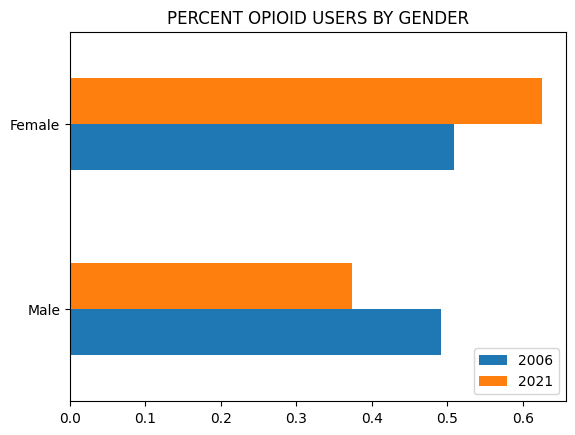

In [74]:
gender.plot.barh(title="PERCENT OPIOID USERS BY GENDER")

RECEIVE GOVERNMENT ASSISTANCE

In [75]:
six_govtprog = six_demo.loc[(six_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/six_user_len
tw1_govtprog = tw1_demo.loc[(tw1_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/tw1_user_len

In [76]:
d = {2006:[x for x in six_govtprog],2021:[x for x in tw1_govtprog]}
income = pd.DataFrame(data=d,index=["receive","do not receive"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE'}>

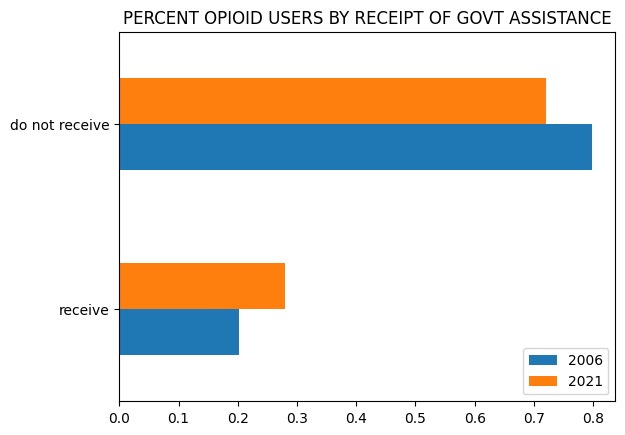

In [77]:
income.plot.barh(title="PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE")

INCOME

In [78]:
six_income = six_demo.loc[(six_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/six_user_len

In [79]:
tw1_income = tw1_demo.loc[(tw1_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/tw1_user_len

In [80]:
d = {2006:[x for x in six_income],2021:[x for x in tw1_income]}
income = pd.DataFrame(data=d,index=["<20K","20K-49K","50K-75K",">75K"])

<Axes: title={'center': 'PERCENT OF OPIOID USERS BY INCOME BRACKET'}>

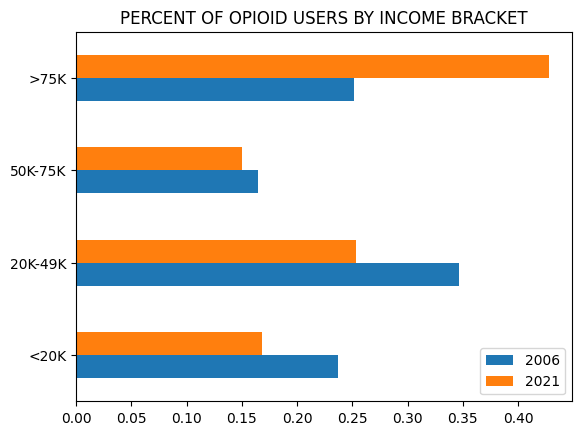

In [81]:
income.plot.barh(title='PERCENT OF OPIOID USERS BY INCOME BRACKET')

CORRELATION HEAT MAP

In [318]:
np.set_printoptions(precision=2,suppress=True)

In [319]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [320]:
dm_regnames = ['welfare','income','poverty','gender-race','education level','employment',
            'health','marital status','major depression ep','severe psych distress','mental health hospitalization']

#dm_regnames = ['welfare','no welfare','$0-20k','$20-50k','$50-75k','$75k+','1xPoverty','2xPoverty','3+xPoverty','WhiteMale','WhiteFemale','BlackMale','BlackFemale','HispanicMale','HispanicFemale','Other',
#               'someHS','HSGrad','SomeColl','CollGrad','WorkFullTime','WorkPartTime','Unemployed','Other','ExcellentHealth','GoodHealth','FairHealth','PoorHealth','Married','Widowed','Divorced','NeverMarried',
#               'Depression','noDepression','PsychDistress','noPsychDistress','admittedMentalHosp','noAdmitMentalHosp']

du_regnames = ['tobacco','alcohol','marijuana','cocaine','crack','hallucinogens','inhalants','tranquilizer',
            'stimulant','methamphetamines','sedatives']
            
dm_corrlist_2006 = ['GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2','EMPSTATY',
                    'HEALTH2','IRMARIT','AJAMDEYR','SPDYRADJ','AMHINP2']

du_corrlist_2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR",
                    "STMYR","MTHYR","SEDYR"]

dm_corrlist_2021 = ['GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT','IRWRKSTAT',
                    'HEALTH2','IRMARIT','IRAMDEYR','SPDPSTYR','AMHINP2']

du_corrlist_2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR",
                    "TRQANYYR","STMANYYR","METHAMYR","SEDANYYR"]

dm_corrdf_2006 = six.loc[six["CATAG3"]==4,dm_corrlist_2006]
du_corrdf_2006 = six.loc[six["CATAG3"]==4,du_corrlist_2006]
dm_corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,dm_corrlist_2021]
du_corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,du_corrlist_2021]

In [321]:
#dm_corrdf_2006["INCOME"] = dm_corrdf_2006["INCOME"].map({0:'0-20',1:'20-50',2:'50-75',3:'75+'})
#dm_corrdf_2006["SEXRACE"] = dm_corrdf_2006["SEXRACE"].map({0:'White Male',1:'White Female',2:'Black Male',3:'Black Female',4:'Hispanic Male',5:'Hispanic Female',6:'Other'})
#dm_corrdf_2006["EDUCCAT2"] = dm_corrdf_2006["EDUCCAT2"].map({0:'Some HS',1:'HS Diploma',2:'Some College',3:'College Grad'})
#dm_corrdf_2006["EMPSTATY"] = dm_corrdf_2006["EMPSTATY"].map({0:'Full Time',1:'Part Time',2:'Unemployed',3:'Other'})
#dm_corrdf_2006["HEALTH2"]=dm_corrdf_2006["HEALTH2"].map({0:'Excellent',1:'Very Good',2:'Good',3:'Poor'})
#dm_corrdf_2006["IRMARIT"]=dm_corrdf_2006["IRMARIT"].map({0:'Married',1:'Widowed',2:'Divorced',3:'Never Married'})
#dm_corrdf_2006["AJAMDEYR"]=dm_corrdf_2006["AJAMDEYR"].map({0:'yes',1:'no'})
#dm_corrdf_2006["AMHINP2"] = dm_corrdf_2006["AMHINP2"].map({0:'yes',1:'no'})

#dm_corrdf_2021["INCOME"] = dm_corrdf_2021["INCOME"].map({0:'0-20',1:'20-50',2:'50-75',3:'75+'})
#dm_corrdf_2021["SEXRACE"] = dm_corrdf_2021["SEXRACE"].map({0:'White Male',1:'White Female',2:'Black Male',3:'Black Female',4:'Hispanic Male',5:'Hispanic Female',6:'Other'})
#dm_corrdf_2021["EDUHIGHCAT"] = dm_corrdf_2021["EDUHIGHCAT"].map({0:'Some HS',1:'HS Diploma',2:'Some College',3:'College Grad'})
#dm_corrdf_2021["IRWRKSTAT"] = dm_corrdf_2021["IRWRKSTAT"].map({0:'Full Time',1:'Part Time',2:'Unemployed',3:'Other'})
#dm_corrdf_2021["HEALTH2"]=dm_corrdf_2021["HEALTH2"].map({0:'Excellent',1:'Very Good',2:'Good',3:'Poor'})
#dm_corrdf_2021["IRMARIT"]=dm_corrdf_2021["IRMARIT"].map({0:'Married',1:'Widowed',2:'Divorced',3:'Never Married'})
#dm_corrdf_2021["IRAMDEYR"]=dm_corrdf_2021["IRAMDEYR"].map({0:'yes',1:'no'})
#dm_corrdf_2021["AMHINP2"] = dm_corrdf_2021["AMHINP2"].map({0:'yes',1:'no'})

#dm_corrdf_2021 = dm_corrdf_2021.astype('category')

#dm_corrdf_2006=dm_corrdf_2006.astype('category')

In [322]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%c3%a9rs-coefficient-matrix
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [323]:
def corrmat(dataframe):
    colname = dataframe.columns.values.tolist()
    cols = len(colname)
    mat = np.empty([cols,cols])
    for x in range(cols):
        for y in range(x+1,cols):
            confusion_matrix = pd.crosstab(dataframe[colname[x]],dataframe[colname[y]]).to_numpy()
            corrval = round(cramers_corrected_stat(confusion_matrix),2)
            #print(corrval)
            mat[x,y]=round(corrval,2)
    return np.triu(mat,k=1)
            

In [324]:
def heatmap(data,year,regnames):
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    
    fig.set_size_inches(10,10)
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(regnames)), labels=regnames)
    ax.set_yticks(np.arange(len(regnames)), labels=regnames)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(regnames)):
        for j in range(len(regnames)):
            text = ax.text(j, i, data[i, j],
                           ha="center", va="center", color="w", fontsize='large')
    
    ax.set_title(f"Correlation Heatmap of Selected Fields from {year} NSDUH Survey")
    #fig.tight_layout()
    plt.show()

In [325]:
dm_data2006 = corrmat(dm_corrdf_2006)
du_data2006 = corrmat(du_corrdf_2006)

dm_data2021 = corrmat(dm_corrdf_2021)
du_data2021 = corrmat(du_corrdf_2021)


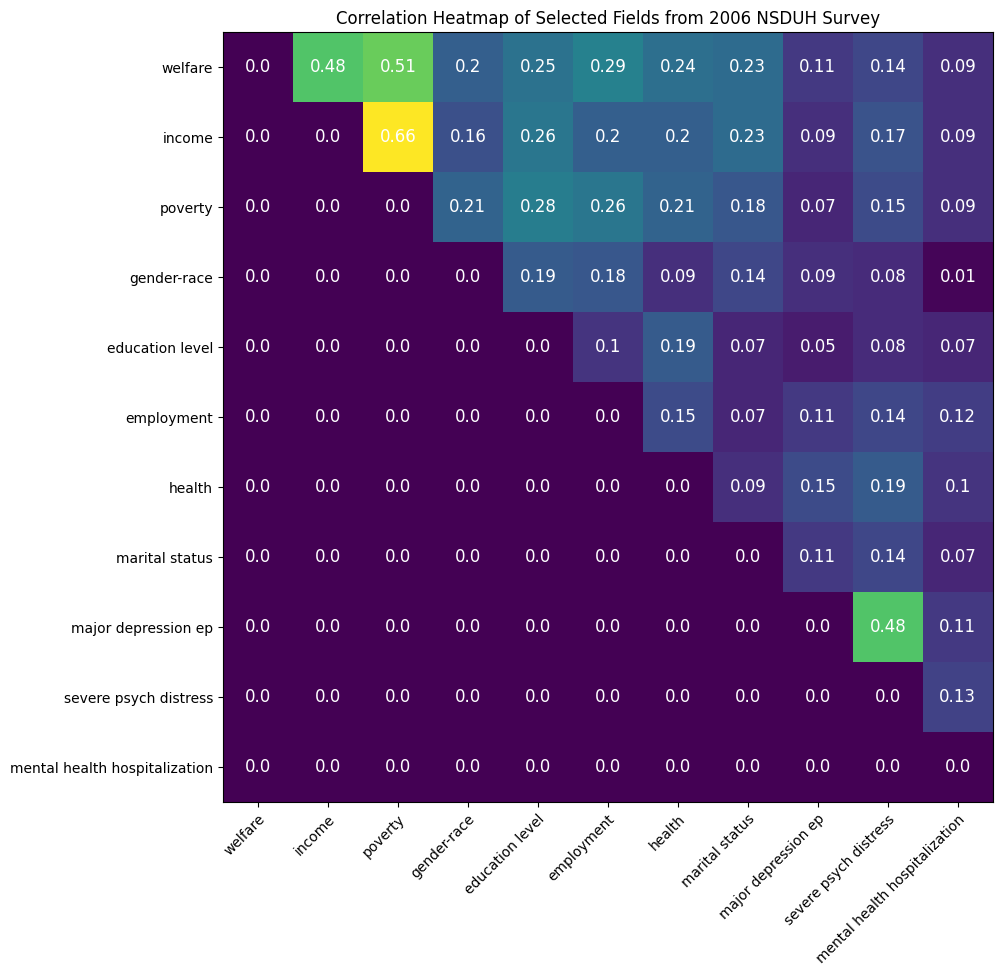

In [326]:
heatmap(dm_data2006,2006,dm_regnames)

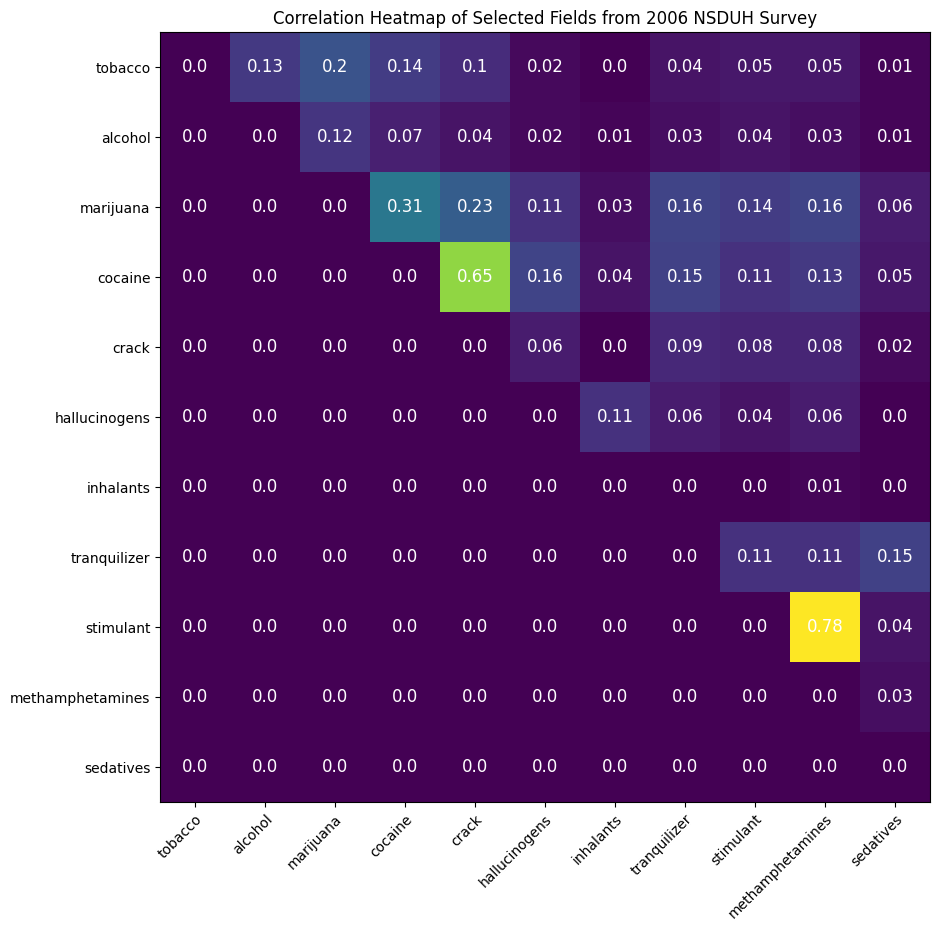

In [146]:
heatmap(du_data2006,2006,du_regnames)

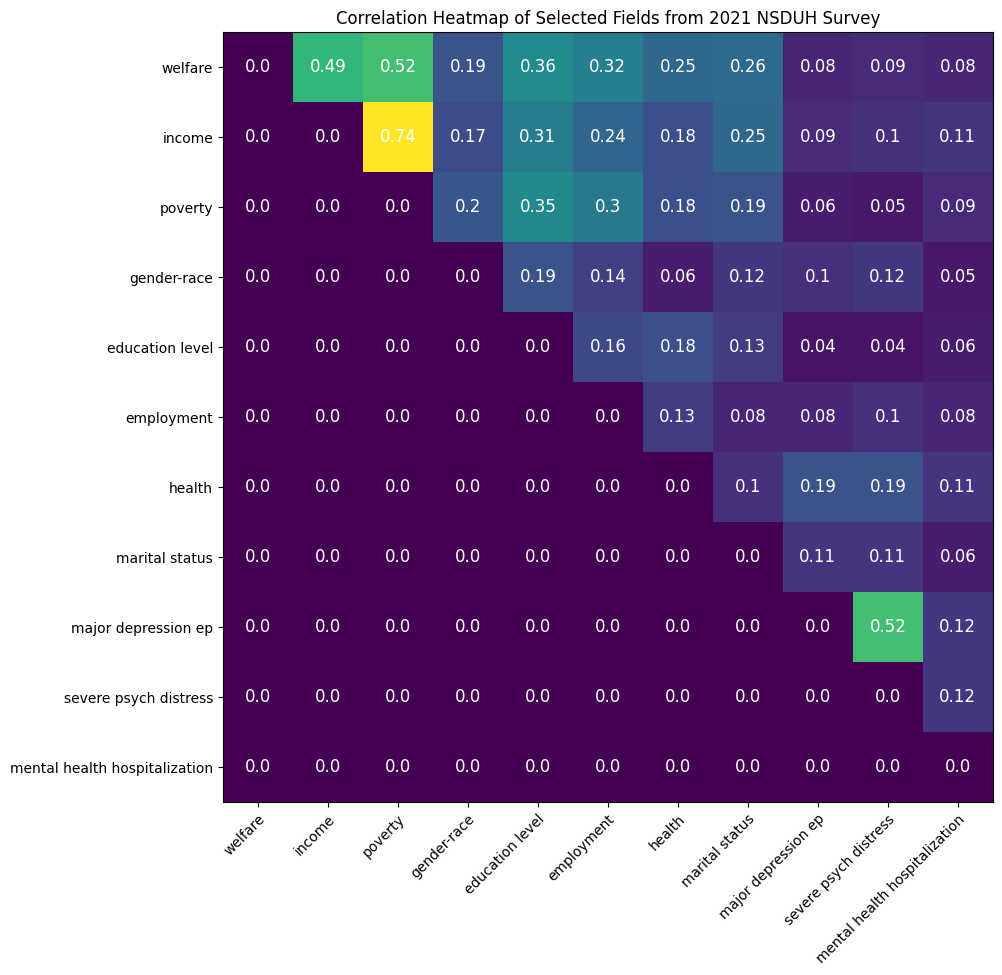

In [147]:
heatmap(dm_data2021,2021,dm_regnames)

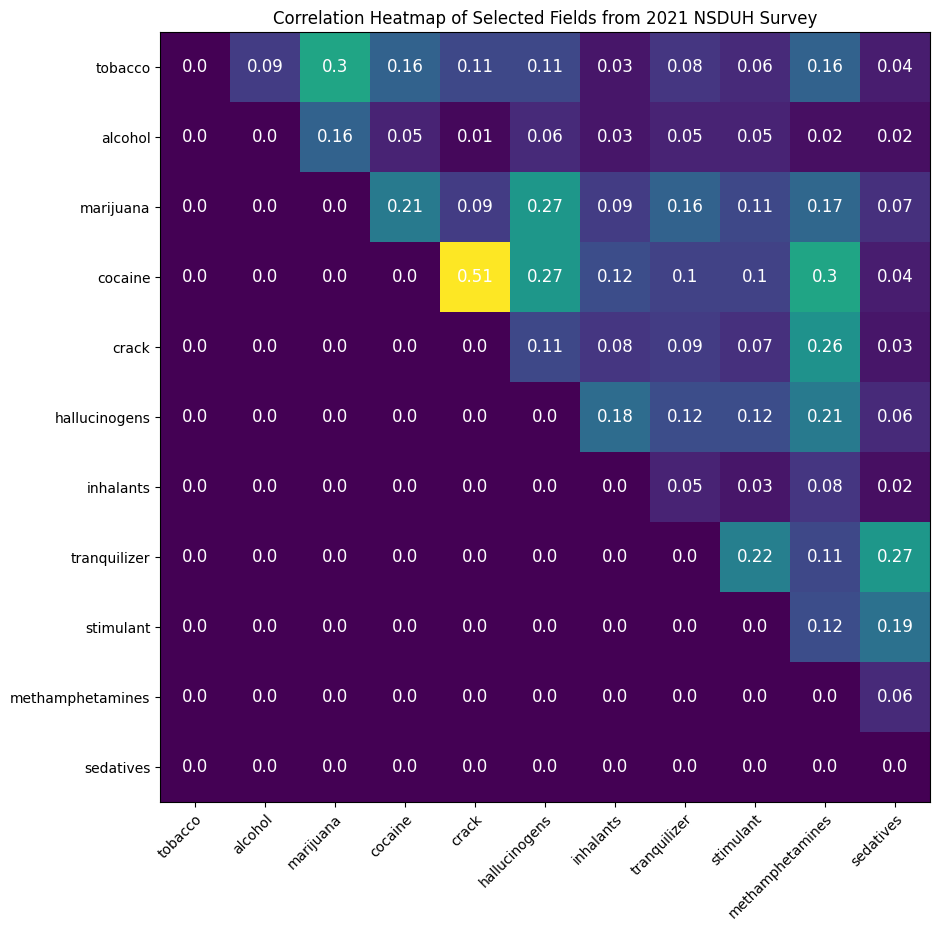

In [148]:
heatmap(du_data2021,2021,du_regnames)

Now to create the machine learning models

Import the needed packages from sklearn

In [337]:
from collections import Counter

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression

#DECISION BOUNDARY PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Set up the 4 dataframes with the finally selected variables based on results of the correlation heat map

In [338]:
#2006 drug use
du_six_final = ["TOBYR","ALCYR","MRJYR","COCYR","HALYR","INHYR","TRQYR","STMYR","SEDYR"]
#2021 drug use
du_tw1_final = ["TOBYR","ALCYR","MRJYR","COCYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
                "SEDANYYR"]

#2006 demographics
dm_six_final = ["INCOME","SEXRACE","EDUCCAT2","EMPSTATY","HEALTH2","IRMARIT","AJAMDEYR","AMHINP2"]
#2021 demographics
dm_tw1_final = ['INCOME','SEXRACE','EDUHIGHCAT','IRWRKSTAT','HEALTH2','IRMARIT','IRAMDEYR',"AMHINP2"]


In [339]:
du_six_X = six.loc[six["CATAG3"]==4,du_six_final].astype('category')
du_six_y = six.loc[six["CATAG3"]==4,"CLASS"].astype('category')

dm_six_X = six.loc[six["CATAG3"]==4,dm_six_final].astype('category')
dm_six_y = six.loc[six["CATAG3"]==4,"CLASS"].astype('category')

du_tw1_X = tw1.loc[tw1["CATAG3"]==4,du_tw1_final].astype('category')
du_tw1_y = tw1.loc[tw1["CATAG3"]==4,"CLASS"].astype('category')

dm_tw1_X = tw1.loc[tw1["CATAG3"]==4,dm_tw1_final].astype('category')
dm_tw1_y = tw1.loc[tw1["CATAG3"]==4,"CLASS"].astype('category')

In [340]:
for x in du_six_final:
    print(x,": ",set(du_six_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALYR :  {0, 1}
INHYR :  {0, 1}
TRQYR :  {0, 1}
STMYR :  {0, 1}
SEDYR :  {0, 1}


In [341]:
for x in du_tw1_final:
    print(x,": ",set(du_tw1_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALLUCYR :  {0, 1}
INHALYR :  {0, 1}
TRQANYYR :  {0, 1}
STMANYYR :  {0, 1}
SEDANYYR :  {0, 1}


In [342]:
for x in dm_six_final:
    print(x,": ",set(dm_six_X[x].tolist()))

INCOME :  {1, 2, 3, 4}
SEXRACE :  {1, 2, 3, 4, 5, 6, 7}
EDUCCAT2 :  {1, 2, 3, 4}
EMPSTATY :  {1, 2, 3, 4}
HEALTH2 :  {1.0, 2.0, 3.0, 4.0, nan, nan, nan, nan}
IRMARIT :  {1, 2, 3, 4}
AJAMDEYR :  {1.0, 2.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
AMHINP2 :  {1.0, 2.0, nan, nan, nan, nan, nan, nan, nan}


In [343]:
for x in dm_tw1_final:
    print(x,": ",set(dm_tw1_X[x].tolist()))

INCOME :  {1, 2, 3, 4}
SEXRACE :  {1, 2, 3, 4, 5, 6, 7}
EDUHIGHCAT :  {1, 2, 3, 4}
IRWRKSTAT :  {1, 2, 3, 4}
HEALTH2 :  {1.0, 2.0, 3.0, 4.0, nan, nan}
IRMARIT :  {1, 2, 3, 4}
IRAMDEYR :  {0.0, 1.0}
AMHINP2 :  {1.0, 2.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

Impute some missing data

In [344]:
imputer = IterativeImputer(random_state=42)

imputer.fit(dm_six_X)
dm_six_X_values = np.transpose(imputer.transform(dm_six_X))

for x in range(len(dm_six_final)):
    dm_six_X[dm_six_final[x]] = np.round(dm_six_X_values[x])

imputer.fit(dm_tw1_X)
dm_tw1_X_values = np.transpose(imputer.transform(dm_tw1_X))

for x in range(len(dm_tw1_final)):
    dm_tw1_X[dm_tw1_final[x]]= np.round(dm_tw1_X_values[x])



In [345]:
dm_six_X = dm_six_X.astype('int')
for x in dm_six_final:
    dm_six_X[x] = (dm_six_X[x]-1).astype('category')

In [346]:
dm_tw1_nonzero = ['INCOME','SEXRACE','EDUHIGHCAT','IRWRKSTAT',
                  'HEALTH2','IRMARIT','AMHINP2']
dm_tw1_X = dm_tw1_X.astype('int')
for x in dm_tw1_nonzero:
    dm_tw1_X[x] = (dm_tw1_X[x]-1).astype('category')

In [347]:
du_six_X = du_six_X.astype('category')
du_six_y = du_six_y.astype('category')

dm_six_X = dm_six_X.astype('category')
dm_six_y = dm_six_y.astype('category')

du_tw1_X = du_tw1_X.astype('category')
du_tw1_y = du_tw1_y.astype('category')

dm_tw1_X = dm_tw1_X.astype('category')
dm_tw1_y = dm_tw1_y.astype('category')

In [348]:
for x in du_six_final:
    print(x,": ",set(du_six_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALYR :  {0, 1}
INHYR :  {0, 1}
TRQYR :  {0, 1}
STMYR :  {0, 1}
SEDYR :  {0, 1}


In [349]:
for x in du_tw1_final:
    print(x,": ",set(du_tw1_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALLUCYR :  {0, 1}
INHALYR :  {0, 1}
TRQANYYR :  {0, 1}
STMANYYR :  {0, 1}
SEDANYYR :  {0, 1}


In [350]:
dm_six_X["INCOME"] = dm_six_X["INCOME"].map({0:'0-20',1:'20-50',2:'50-75',3:'75+'})
dm_six_X["SEXRACE"] = dm_six_X["SEXRACE"].map({0:'White Male',1:'White Female',2:'Black Male',3:'Black Female',4:'Hispanic Male',5:'Hispanic Female',6:'Other'})
dm_six_X["EDUCCAT2"] = dm_six_X["EDUCCAT2"].map({0:'Some HS',1:'HS Diploma',2:'Some College',3:'College Grad'})
dm_six_X["EMPSTATY"] = dm_six_X["EMPSTATY"].map({0:'Full Time',1:'Part Time',2:'Unemployed',3:'Other'})
dm_six_X["HEALTH2"]=dm_six_X["HEALTH2"].map({0:'Excellent',1:'Very Good',2:'Good',3:'Poor'})
dm_six_X["IRMARIT"]=dm_six_X["IRMARIT"].map({0:'Married',1:'Widowed',2:'Divorced',3:'Never Married'})
dm_six_X["AJAMDEYR"]=dm_six_X["AJAMDEYR"].map({0:'yes',1:'no'})
dm_six_X["AMHINP2"] = dm_six_X["AMHINP2"].map({0:'yes',1:'no'})

dm_tw1_X["INCOME"] = dm_tw1_X["INCOME"].map({0:'0-20',1:'20-50',2:'50-75',3:'75+'})
dm_tw1_X["SEXRACE"] = dm_tw1_X["SEXRACE"].map({0:'White Male',1:'White Female',2:'Black Male',3:'Black Female',4:'Hispanic Male',5:'Hispanic Female',6:'Other'})
dm_tw1_X["EDUHIGHCAT"] = dm_tw1_X["EDUHIGHCAT"].map({0:'Some HS',1:'HS Diploma',2:'Some College',3:'College Grad'})
dm_tw1_X["IRWRKSTAT"] = dm_tw1_X["IRWRKSTAT"].map({0:'Full Time',1:'Part Time',2:'Unemployed',3:'Other'})
dm_tw1_X["HEALTH2"]=dm_tw1_X["HEALTH2"].map({0:'Excellent',1:'Very Good',2:'Good',3:'Poor'})
dm_tw1_X["IRMARIT"]=dm_tw1_X["IRMARIT"].map({0:'Married',1:'Widowed',2:'Divorced',3:'Never Married'})
dm_tw1_X["IRAMDEYR"]=dm_tw1_X["IRAMDEYR"].map({0:'no',1:'yes'})
dm_tw1_X["AMHINP2"] = dm_tw1_X["AMHINP2"].map({0:'yes',1:'no'})

In [351]:
for x in dm_six_final:
    print(x,": ",set(dm_six_X[x].tolist()))

INCOME :  {'75+', '20-50', '0-20', '50-75'}
SEXRACE :  {'Other', 'Hispanic Male', 'White Female', 'Hispanic Female', 'Black Female', 'Black Male', 'White Male'}
EDUCCAT2 :  {'Some HS', 'College Grad', 'Some College', 'HS Diploma'}
EMPSTATY :  {'Full Time', 'Other', 'Part Time', 'Unemployed'}
HEALTH2 :  {'Excellent', 'Very Good', 'Poor', 'Good'}
IRMARIT :  {'Widowed', 'Married', 'Divorced', 'Never Married'}
AJAMDEYR :  {'yes', 'no'}
AMHINP2 :  {'yes', 'no'}


In [352]:
for x in dm_tw1_final:
    print(x,": ",set(dm_tw1_X[x].tolist()))

INCOME :  {'75+', '20-50', '0-20', '50-75'}
SEXRACE :  {'Other', 'Hispanic Male', 'White Female', 'Hispanic Female', 'Black Female', 'Black Male', 'White Male'}
EDUHIGHCAT :  {'Some HS', 'College Grad', 'Some College', 'HS Diploma'}
IRWRKSTAT :  {'Full Time', 'Other', 'Part Time', 'Unemployed'}
HEALTH2 :  {'Good', 'Excellent', 'Poor', 'Very Good'}
IRMARIT :  {'Widowed', 'Married', 'Divorced', 'Never Married'}
IRAMDEYR :  {'yes', 'no'}
AMHINP2 :  {'yes', 'no'}


In [353]:
du_six_X.dtypes

TOBYR    category
ALCYR    category
MRJYR    category
COCYR    category
HALYR    category
INHYR    category
TRQYR    category
STMYR    category
SEDYR    category
dtype: object

In [354]:
dm_six_X.dtypes

INCOME      category
SEXRACE     category
EDUCCAT2    category
EMPSTATY    category
HEALTH2     category
IRMARIT     category
AJAMDEYR    category
AMHINP2     category
dtype: object

In [355]:
du_tw1_X.dtypes

TOBYR       category
ALCYR       category
MRJYR       category
COCYR       category
HALLUCYR    category
INHALYR     category
TRQANYYR    category
STMANYYR    category
SEDANYYR    category
dtype: object

In [356]:
dm_tw1_X.dtypes

INCOME        category
SEXRACE       category
EDUHIGHCAT    category
IRWRKSTAT     category
HEALTH2       category
IRMARIT       category
IRAMDEYR      category
AMHINP2       category
dtype: object

split each dataframe into 80/20 train/test

In [357]:
du_six_trainX, du_six_testX, du_six_trainy, du_six_testy = train_test_split(du_six_X, 
                                                                            du_six_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [358]:
dm_six_trainX, dm_six_testX, dm_six_trainy, dm_six_testy = train_test_split(dm_six_X, 
                                                                            dm_six_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [359]:
du_tw1_trainX, du_tw1_testX, du_tw1_trainy, du_tw1_testy = train_test_split(du_tw1_X, 
                                                                            du_tw1_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [360]:
dm_tw1_trainX, dm_tw1_testX, dm_tw1_trainy, dm_tw1_testy = train_test_split(dm_tw1_X, 
                                                                            dm_tw1_y,
                                                                            test_size = .2,
                                                                            random_state=42)

SETTING UP HYPERPARAMETER TUNING AND CROSS VALIDATION

In [173]:
def imb_pipeline(clf,X,y,params):
    pipe = Pipeline([('over',SMOTEN()),
                     ('under',RandomUnderSampler()),
                     ('classifier',clf)])
    
    gcv = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       cv=StratifiedKFold(n_splits=5),
                       #cv = 5,
                       scoring='average_precision')
    gcv.fit(X,y)
    return gcv

In [175]:
#DECISION TREES
#------------------------
tree_parameters = {'classifier__max_depth':[2,3,5],
                   #'classifier__min_samples_leaf':[,5,10,15,20],
                   'over__sampling_strategy':[.1,.2,.3,.4,.5],
                   'over__k_neighbors':[2,3,4,5,6,7],
                   'under__sampling_strategy':[.6,.7,.8,.9]
                  }
dtree = tree.DecisionTreeClassifier()


#BAYES CLASSIFIER
#------------------------
bayes_parameters = {'classifier__fit_prior':[True,False],
                   'over__sampling_strategy':[.1,.2,.3,.4,.5],
                   'over__k_neighbors':[2,3,4,5,6,7],
                   'under__sampling_strategy':[.6,.7,.8,.9]
                   }
bayes = CategoricalNB()


#LOGISTIC REGRESSION
#------------------------
logit_parameters = {'classifier__tol':[.0001,.001,.01,.1],
                   'over__sampling_strategy':[.1,.2,.3,.4,.5],
                   'over__k_neighbors':[2,3,4,5],
                   'under__sampling_strategy':[.6,.7,.8,.9]
                   }
logit = LogisticRegression(solver='sag')


In [176]:
def optimal_hyper(x):
    return x.cv_results_['params'][list(np.where(x.cv_results_['rank_test_score']==1)[0])[0]]

In [177]:
def optimal_score(x):
    return x.cv_results_['mean_test_score'][list(np.where(x.cv_results_['rank_test_score']==1)[0])[0]]

In [178]:
def bigpic(x):
    return f"PARAMS:{optimal_hyper(x)}; SCORE:{optimal_score(x)}"

In [180]:
#2006 drug use decision tree optimal hyperparameters
#tree_hpt.fit(du_six_trainX,du_six_trainy)
tree_hpt = imb_pipeline(dtree,du_six_trainX,du_six_trainy,tree_parameters)
#tree_hpt.cv_results_['params'][list(np.where(tree_hpt.cv_results_['rank_test_score']==1)[0])[0]]
bigpic(tree_hpt)

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.9}; SCORE:0.1317985030677741"

In [222]:
#2006 drug use bayes optimal hyperparameters

bayes_hpt = imb_pipeline(bayes,du_six_trainX,du_six_trainy,bayes_parameters)
bigpic(bayes_hpt)
#OPTIMAL HYPERPARAMETERS
#"PARAMS:{
#'classifier__fit_prior': False, 
#'over__k_neighbors': 5, 
#'over__sampling_strategy': 0.1, 
#'under__sampling_strategy': 0.9}; 
#SCORE:0.1667"

In [182]:
#2006 drug use logit optimal hyperparameters
#logit_hpt.fit(du_six_trainX,du_six_trainy)
logit_hpt = imb_pipeline(logit,du_six_trainX,du_six_trainy,logit_parameters)
bigpic(logit_hpt)

"PARAMS:{'classifier__tol': 0.1, 'over__k_neighbors': 5, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.9}; SCORE:0.1438377927025573"

In [183]:
#2006 demographic dtree optimal hyperparameters
#tree_hpt.fit(dm_six_trainX,dm_six_trainy)
#tree_hpt.cv_results_['params'][list(np.where(tree_hpt.cv_results_['rank_test_score']==1)[0])[0]]

dm_six_tree = imb_pipeline(dtree,pd.get_dummies(dm_six_trainX),dm_six_trainy,tree_parameters)
bigpic(dm_six_tree)

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 7, 'over__sampling_strategy': 0.3, 'under__sampling_strategy': 0.8}; SCORE:0.021058406375917015"

In [184]:
#2006 demographic bayes optimal hyperparameters
#bayes_hpt.fit(dm_six_trainX,dm_six_trainy)
dm_six_bayes = imb_pipeline(bayes,pd.get_dummies(dm_six_trainX),dm_six_trainy,bayes_parameters)
bigpic(dm_six_bayes)

"PARAMS:{'classifier__fit_prior': False, 'over__k_neighbors': 6, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.8}; SCORE:0.05999728190716887"

In [185]:
#2006 demographic logit hyperparameters
#logit_hpt.fit(dm_six_trainX,dm_six_trainy)
dm_six_logit = imb_pipeline(logit,pd.get_dummies(dm_six_trainX),dm_six_trainy,logit_parameters)
bigpic(dm_six_logit)

"PARAMS:{'classifier__tol': 0.001, 'over__k_neighbors': 3, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.8}; SCORE:0.08400722176052079"

In [186]:
#2021 drug use dtree hyperparameters
#tree_hpt.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_tree = imb_pipeline(dtree,du_tw1_trainX,du_tw1_trainy,tree_parameters)
bigpic(du_tw1_tree)

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.2, 'under__sampling_strategy': 0.7}; SCORE:0.1999427549729119"

In [187]:
#2021 drug use bayes hyperparameters
#bayes_hpt.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_bayes = imb_pipeline(bayes,du_tw1_trainX,du_tw1_trainy,bayes_parameters)
bigpic(du_tw1_bayes)

"PARAMS:{'classifier__fit_prior': False, 'over__k_neighbors': 3, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.6}; SCORE:0.21760179900165771"

In [188]:
#2021 drug use logit hyperparameters
#logit_hpt.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_logit = imb_pipeline(logit,du_tw1_trainX,du_tw1_trainy,logit_parameters)
bigpic(du_tw1_logit)

"PARAMS:{'classifier__tol': 0.001, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.8}; SCORE:0.22390865731846438"

In [189]:
#2021 demographics dtree hyperparameters
#tree_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_tree = imb_pipeline(dtree,pd.get_dummies(dm_tw1_trainX),dm_tw1_trainy,tree_parameters)
bigpic(dm_tw1_tree)

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 4, 'over__sampling_strategy': 0.2, 'under__sampling_strategy': 0.7}; SCORE:0.08133071235113665"

In [190]:
#2021 demographics bayes hyperparameters
#bayes_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_bayes = imb_pipeline(bayes,pd.get_dummies(dm_tw1_trainX),dm_tw1_trainy,bayes_parameters)
bigpic(dm_tw1_bayes)

"PARAMS:{'classifier__fit_prior': True, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.7}; SCORE:0.11929019284780171"

In [191]:
#2021 demographics logit hyperparameters
#logit_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_logit = imb_pipeline(logit,pd.get_dummies(dm_tw1_trainX),dm_tw1_trainy,logit_parameters)
bigpic(dm_tw1_logit)

"PARAMS:{'classifier__tol': 0.0001, 'over__k_neighbors': 5, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.6}; SCORE:0.11599998923871872"

Now that we know the optimal hyperparameters, time to create final 12 models(3 models x 4 dataset)

PIPELINE

In [361]:
def tree_pipe(md,k,os,us):
    pipe = Pipeline([('over',SMOTEN(sampling_strategy=os, k_neighbors=k)),
                     ('under',RandomUnderSampler(sampling_strategy=us)),
                     ('class',tree.DecisionTreeClassifier(max_depth=md))])
    return pipe

def bayes_pipe(fp,k,os,us):
    pipe = Pipeline([('over',SMOTEN(sampling_strategy=os, k_neighbors=k)),
                     ('under',RandomUnderSampler(sampling_strategy=us)),
                     ('class',CategoricalNB(fit_prior=fp))])
    return pipe

def logit_pipe(t,k,os,us):
    pipe = Pipeline([('over',SMOTEN(sampling_strategy=os, k_neighbors=k)),
                     ('under',RandomUnderSampler(sampling_strategy=us)),
                     ('class',LogisticRegression(tol=t,solver='liblinear'))])
    return pipe

def to_labels(pos_probs, threshold):
    return(pos_probs >= threshold).astype('int')

def threshold_search(model,testX,testy):
    yhat = model.predict_proba(testX)
    probs = yhat[:,1]
    thresholds = np.arange(0,1,.001)
    scores = [f1_score(testy,to_labels(probs,t)) for t in thresholds]
    ix = np.argmax(scores)
    print(f"Threshold={thresholds[ix]}, F-Score = {scores[ix]}")
    #plot_f1_search(thresholds,scores)
    return scores
def plot_f1_search(treescore,bayescore,logitscore,chart_title):
    thresholds = np.arange(0,1,.001)
    fig,ax = plt.subplots()
    ax.plot(thresholds,treescore,label='Decision Tree')
    ax.plot(thresholds,bayescore, label='Naive Bayes')
    ax.plot(thresholds,logitscore, label='Logistic Regression')
    ax.set(xlabel='threshold', ylabel='f1 score',title=chart_title)
    ax.grid()
    ax.legend(loc='lower left')
    plt.show()
    

2006 DRUG USE VARIABLES

In [362]:
#2006 Drug Use dtree
du_six_tree_final = tree_pipe(5,2,.4,.9).fit(du_six_trainX,du_six_trainy)
du_six_tree_score = threshold_search(du_six_tree_final, du_six_testX, du_six_testy)

Threshold=0.763, F-Score = 0.0909090909090909


In [414]:
#2006 Drug Use Bayes
du_six_bayes_final = bayes_pipe(False,5,.1,.9).fit(du_six_trainX,du_six_trainy)
du_six_bayes_score = threshold_search(du_six_bayes_final, du_six_testX, du_six_testy)

Threshold=0.89, F-Score = 0.10810810810810811


In [425]:
#2006 Drug Use Logit
du_six_logit_final = logit_pipe(.1,5,.1,.9).fit(du_six_trainX,du_six_trainy)
du_six_logit_score = threshold_search(du_six_logit_final,du_six_testX.astype(float),du_six_testy)

Threshold=0.835, F-Score = 0.13333333333333333


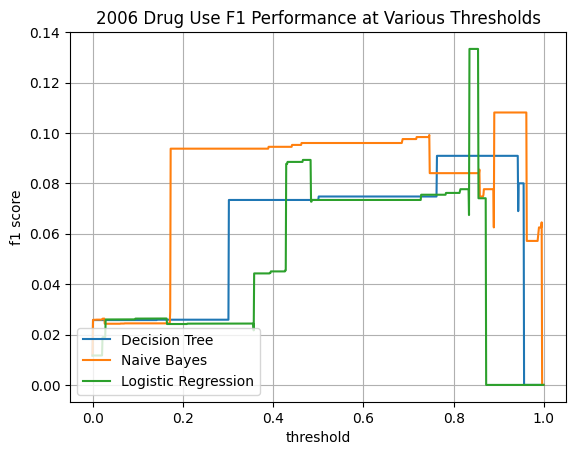

In [426]:
plot_f1_search(du_six_tree_score, 
               du_six_bayes_score, 
               du_six_logit_score,
               "2006 Drug Use F1 Performance at Various Thresholds")

2006 DEMOGRAPHIC VARIABLES

In [427]:
#2006 Demogra dtree
dm_six_tree_final = tree_pipe(5,7,.3,.8).fit(pd.get_dummies(dm_six_trainX),dm_six_trainy)
dm_six_tree_score = threshold_search(dm_six_tree_final, pd.get_dummies(dm_six_testX),dm_six_testy)

Threshold=0.006, F-Score = 0.019867549668874173


In [428]:
#2006 Demogra Bayes
dm_six_bayes_final = bayes_pipe(False,6,.1,.8).fit(pd.get_dummies(dm_six_trainX),dm_six_trainy)
dm_six_bayes_score = threshold_search(dm_six_bayes_final,pd.get_dummies(dm_six_testX),dm_six_testy)

Threshold=0.41100000000000003, F-Score = 0.022598870056497175


In [429]:
#2006 Demogra Logit
dm_six_logit_final = logit_pipe(.001,3,.1,.8).fit(pd.get_dummies(dm_six_trainX),dm_six_trainy)
dm_six_logit_score = threshold_search(dm_six_logit_final,pd.get_dummies(dm_six_testX).astype(float),dm_six_testy)

Threshold=0.198, F-Score = 0.03333333333333333


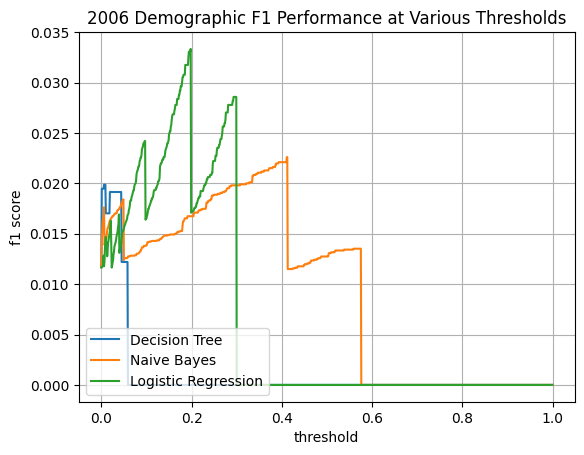

In [430]:
plot_f1_search(dm_six_tree_score, 
               dm_six_bayes_score, 
               dm_six_logit_score,
               "2006 Demographic F1 Performance at Various Thresholds")

In [431]:
#2021 Drug Use dtree
du_tw1_tree_final = tree_pipe(5,2,.2,.7).fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_tree_score = threshold_search(du_tw1_tree_final,du_tw1_testX,du_tw1_testy)

Threshold=0.746, F-Score = 0.2796610169491526


In [432]:
#2021 Drug Use Bayes
du_tw1_bayes_final = bayes_pipe(False,3,.1,.6).fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_bayes_score = threshold_search(du_tw1_bayes_final,du_tw1_testX,du_tw1_testy)

Threshold=0.85, F-Score = 0.30967741935483867


In [433]:
#2021 Drug Use Logit
du_tw1_logit_final = logit_pipe(.0001,2,.1,.8).fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_logit_score = threshold_search(du_tw1_logit_final,du_tw1_testX.astype(float),du_tw1_testy)

Threshold=0.687, F-Score = 0.3320754716981132


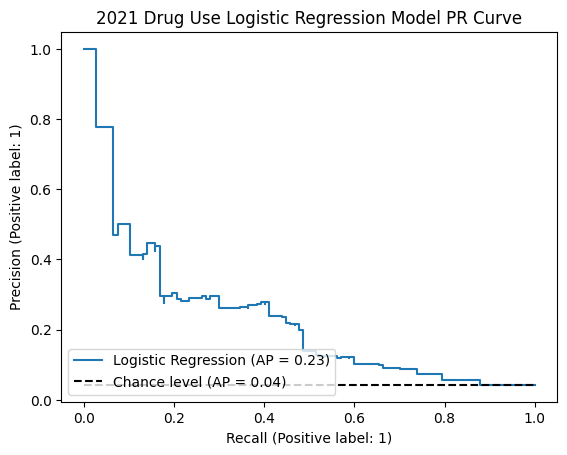

In [434]:
display = PrecisionRecallDisplay.from_estimator(du_tw1_logit_final,du_tw1_testX.astype(float),du_tw1_testy,name="Logistic Regression",plot_chance_level=True)
_ = display.ax_.set_title("2021 Drug Use Logistic Regression Model PR Curve")

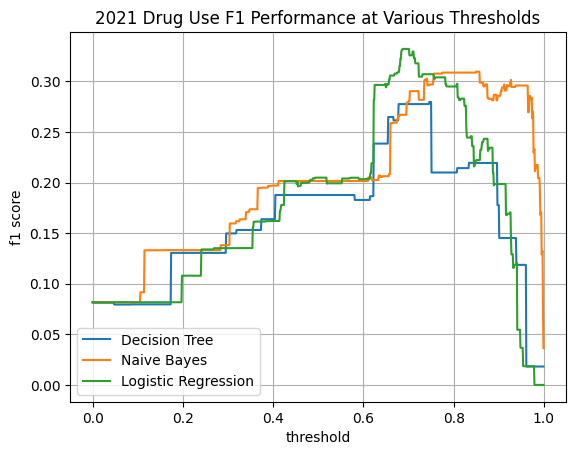

In [435]:
plot_f1_search(du_tw1_tree_score, 
               du_tw1_bayes_score, 
               du_tw1_logit_score,
               "2021 Drug Use F1 Performance at Various Thresholds")

In [436]:
#2021 Demogra dtree
dm_tw1_tree_final = tree_pipe(5,4,.2,.7).fit(pd.get_dummies(dm_tw1_trainX),dm_tw1_trainy)
dm_tw1_tree_score = threshold_search(dm_tw1_tree_final,pd.get_dummies(dm_tw1_testX),dm_tw1_testy)

Threshold=0.466, F-Score = 0.14610389610389612


In [442]:
#2021 Demogra Bayes
dm_tw1_bayes_final = bayes_pipe(True,2,.1,.7).fit(pd.get_dummies(dm_tw1_trainX),dm_tw1_trainy)
dm_tw1_bayes_score = threshold_search(dm_tw1_bayes_final, pd.get_dummies(dm_tw1_testX), dm_tw1_testy)

Threshold=0.745, F-Score = 0.1577981651376147


In [443]:
#2021 Demogra Logit
dm_tw1_logit_final = logit_pipe(.0001,5,.1,.6).fit(pd.get_dummies(dm_tw1_trainX),dm_tw1_trainy)
dm_tw1_logit_score = threshold_search(dm_tw1_logit_final,pd.get_dummies(dm_tw1_testX).astype(float),dm_tw1_testy)

Threshold=0.533, F-Score = 0.1596244131455399


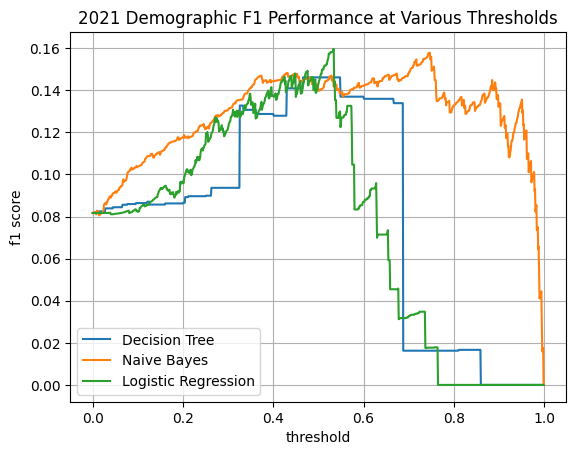

In [444]:
plot_f1_search(dm_tw1_tree_score, 
               dm_tw1_bayes_score, 
               dm_tw1_logit_score,
               "2021 Demographic F1 Performance at Various Thresholds")

Interpretation of Model Coefficients - Logistic Regression

coef_six:  [25.639430221256685, 0.744486695748976, 9.051207394022349, 0.9940537121508346, 3.70406605666503, 0.6230909449238912, 4.792341179802093, 1.1682252481732718, 0.8688964389059158]
coef_tw1:  [2.233934504564353, 0.7749291157225846, 3.0042040123196614, 3.6850827820837817, 1.135530079720705, 0.8014997049735275, 2.2537049844022548, 1.1617362481726345, 2.9253164532675893]


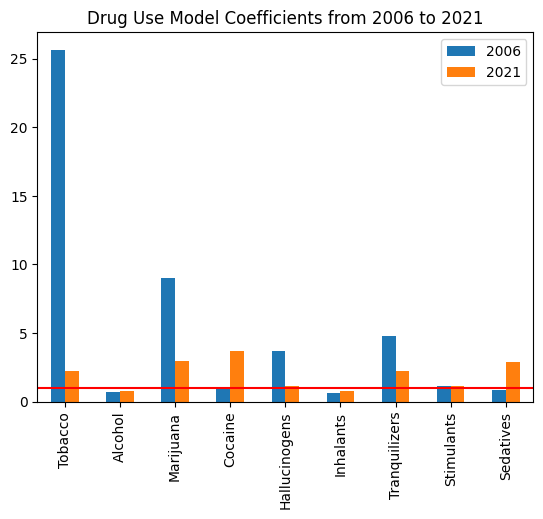

In [445]:
drug_names = ['Tobacco','Alcohol','Marijuana','Cocaine','Hallucinogens','Inhalants','Tranquilizers',
              'Stimulants','Sedatives']
coef_six = np.exp(du_six_logit_final['class'].coef_.tolist()[0]).tolist()
coef_tw1 = np.exp(du_tw1_logit_final['class'].coef_.tolist()[0]).tolist()

data = {'2006':coef_six, '2021':coef_tw1}

print('coef_six: ',coef_six)
print('coef_tw1: ',coef_tw1)

fig,ax=plt.subplots()

du_results = pd.DataFrame(data=data,index = drug_names)
du_results.plot.bar(title='Drug Use Model Coefficients from 2006 to 2021',ax=ax)

ax.hlines(1,xmin=-1,xmax=10,color="red")

plt.show()

coef_six:  [0.18191945167754303, 0.07415209765102952, 0.10404067449793411, 0.1186618468864603, 0.4568233524805895, 0.25835139133615304, 0.41742907403697027, 0.27302586329182804, 0.39498959522238786, 0.18750350007585864, 0.16245600451874617, 0.07300887263446544, 0.1624383293201889, 0.1367470572005323, 0.092834859425565, 0.23401173260416797, 0.3900064342652249, 0.9250039241014285, 1.1234220799200023, 0.13996085229500183, 0.15017593854479497, 0.47541923149547727, 0.552242095383858, 0.11339198665883891, 1.4431838795683274, 0.576209851608395, 0.2597316202756403, 4.070057069452712, 2.265117248407098, 5.8736182210835315, 5.640744260908119]
coef_tw1:  [0.7057092582330239, 0.5613716566704109, 0.3256874618286637, 0.46212553997571904, 0.07810341523885125, 0.06600545632308699, 0.0658974966595613, 0.028677432477758325, 0.04746738132416404, 0.03247574966584059, 0.060142099232535384, 0.2798011369424554, 0.1282766212568482, 0.22576790510471853, 0.18098818796929858, 0.288009777792309, 0.321487849680811

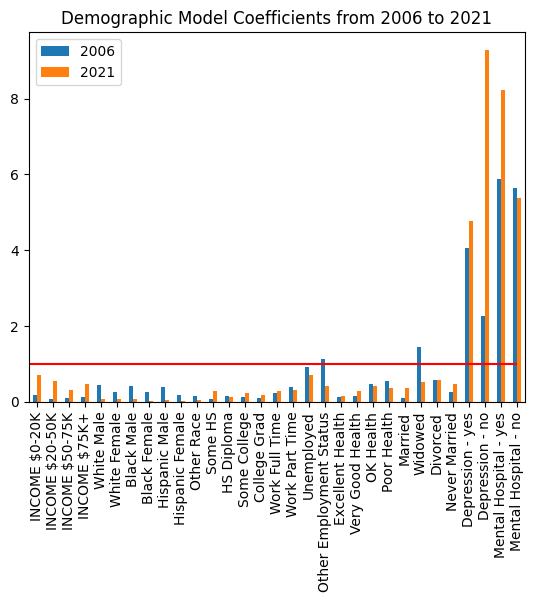

In [451]:
#"INCOME","SEXRACE","EDUCCAT2","EMPSTATY","HEALTH2","IRMARIT","AJAMDEYR","AMHINP2"
#demogr_data = ['Income','Gender-Race','Education','Employment','Health',
#              'Marital Status','Depression','Mental Hospital']

demogr_data = ['INCOME $0-20K',
 'INCOME $20-50K',
 'INCOME $50-75K',
 'INCOME $75K+',
 'White Male',
 'White Female',
 'Black Male',
 'Black Female',
 'Hispanic Male',
 'Hispanic Female',
 'Other Race',
 'Some HS',
 'HS Diploma',
 'Some College',
 'College Grad',
 'Work Full Time',
 'Work Part Time',
 'Unemployed',
 'Other Employment Status',
 'Excellent Health',
 'Very Good Health',
 'OK Health',
 'Poor Health',
 'Married',
 'Widowed',
 'Divorced',
 'Never Married',
 'Depression - yes',
 'Depression - no',
 'Mental Hospital - yes',
 'Mental Hospital - no']

#lsix = [dm_six_logit_final['class'].intercept_.tolist(), 
#     dm_six_logit_final['class'].coef_.tolist()[0]]

#ltw1 = [dm_tw1_logit_final['class'].intercept_.tolist(),
#        dm_tw1_logit_final['class'].coef_.tolist()[0]]

#coef_six = np.exp([item for sublist in lsix for item in sublist]).tolist()
#coef_tw1 = np.exp([item for sublist in ltw1 for item in sublist]).tolist()

coef_six = np.exp(dm_six_logit_final['class'].coef_.tolist()[0]).tolist()
coef_tw1 = np.exp(dm_tw1_logit_final['class'].coef_.tolist()[0]).tolist()

data = {'2006':coef_six, '2021':coef_tw1}

print('coef_six: ',coef_six)
print('coef_tw1: ',coef_tw1)

fig,ax=plt.subplots()

dm_results = pd.DataFrame(data=data,index = demogr_data)
dm_results.plot.bar(title='Demographic Model Coefficients from 2006 to 2021',ax=ax)

ax.hlines(1,xmin=-1,xmax=30,color="red")

plt.show()

In [452]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr))*stdev

In [453]:
def value_finder(list,value):
    index = []
    for x in range(len(list)):
        if list.iloc[x]==value:
            index.append(x)
    return index
    

In [454]:
def PCA_scatter_plot(X,y,title,labels):
    scaler = StandardScaler()
    scaler.fit(X)
    X=scaler.transform(X)
    pca_obj = PCA()
    pca_obj.fit(X,y)
    x_new = pca_obj.transform(X)
    coeff=pca_obj.components_
    n=coeff.shape[0]
    
    
    #pca_obj = PCA(n_components=2).fit_transform(X)
    fig,ax = plt.subplots()
    
    ax.scatter(rand_jitter(np.array([x[0] for x in x_new.tolist()])[value_finder(y,0)].tolist()),
                rand_jitter(np.array([x[1] for x in x_new.tolist()])[value_finder(y,0)].tolist()),
               c="red",
                alpha=.25,
                label="non-user"
               )
    ax.scatter(rand_jitter(np.array([x[0] for x in x_new.tolist()])[value_finder(y,1)].tolist()),
                rand_jitter(np.array([x[1] for x in x_new.tolist()])[value_finder(y,1)].tolist()),
               c="blue",
                alpha=.25,
                label="user"
               )
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0]*15, coeff[i,1]*15,color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]*15, coeff[i,1]*15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]*15, coeff[i,1]*15, labels[i], color = 'k', ha = 'center', va = 'center')

    ax.grid()
    ax.legend()
    ax.set_xlabel("first principal component")
    ax.set_ylabel("second principal component")
    ax.set_title(title)
    plt.show()

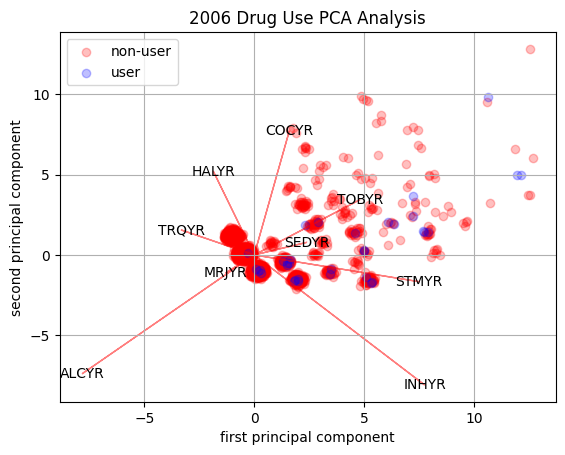

In [455]:
PCA_scatter_plot(du_six_X,du_six_y,"2006 Drug Use PCA Analysis",du_six_final)

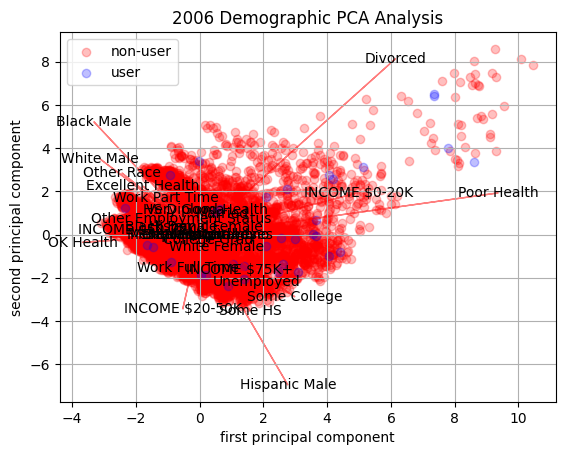

In [456]:
PCA_scatter_plot(pd.get_dummies(dm_six_X),dm_six_y,"2006 Demographic PCA Analysis",demogr_data) #dm_six_final)

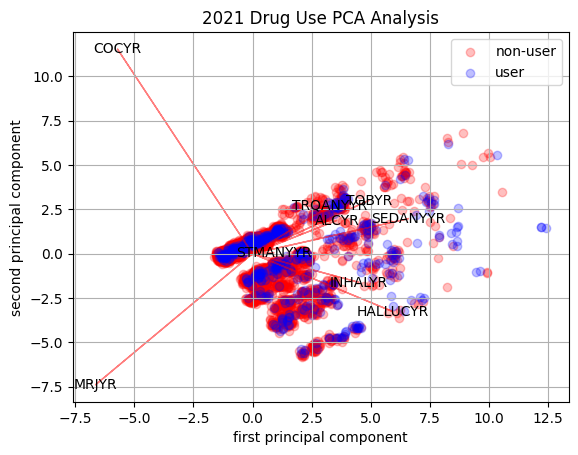

In [457]:
PCA_scatter_plot(du_tw1_X,du_tw1_y,"2021 Drug Use PCA Analysis",du_tw1_final)

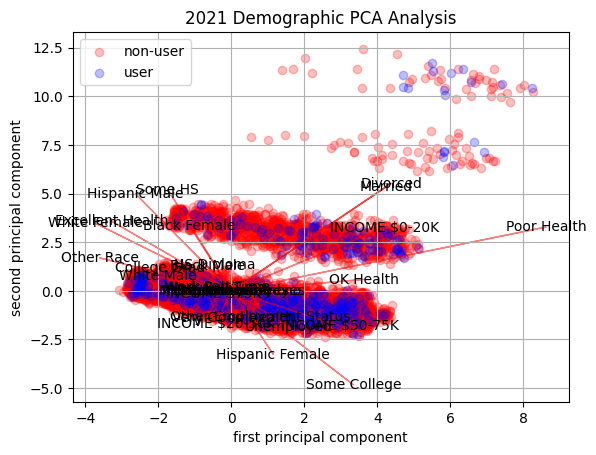

In [458]:
PCA_scatter_plot(pd.get_dummies(dm_tw1_X),dm_tw1_y,"2021 Demographic PCA Analysis",demogr_data)

In [329]:
#six.loc[six["CATAG3"]==4,du_six_final].astype('category').describe()
du_six_X.describe()

,TOBYR,ALCYR,MRJYR,COCYR,HALYR,INHYR,TRQYR,STMYR,SEDYR
count,7665,7665,7665,7665,7665,7665,7665,7665,7665
unique,2,2,2,2,2,2,2,2,2
top,0,1,0,0,0,0,0,0,0
freq,4544,5781,6980,7487,7630,7651,7533,7591,7630


In [331]:
dm_six_X.describe()

,INCOME,SEXRACE,EDUCCAT2,EMPSTATY,HEALTH2,IRMARIT,AJAMDEYR,AMHINP2
count,7665,7665,7665,7665,7665,7665,7665,7665
unique,4,7,4,4,4,4,2,2
top,75+,White Female,HS Diploma,Full Time,Very Good,Married,no,no
freq,2578,2949,2494,5407,2921,5021,7083,7608


In [450]:
dm_tw1_X.describe()

,INCOME,SEXRACE,EDUHIGHCAT,IRWRKSTAT,HEALTH2,IRMARIT,IRAMDEYR,AMHINP2
count,12561,12561,12561,12561,12561,12561,12561,12561
unique,4,7,4,4,4,4,2,2
top,75+,White Female,College Grad,Full Time,Very Good,Married,no,no
freq,6365,4513,5998,8110,4665,7528,11369,12446


In [330]:
du_tw1_X.describe()

,TOBYR,ALCYR,MRJYR,COCYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,SEDANYYR
count,12561,12561,12561,12561,12561,12561,12561,12561,12561
unique,2,2,2,2,2,2,2,2,2
top,0,1,0,0,0,0,0,0,0
freq,9084,9158,9901,12314,12233,12468,10751,11662,11869


In [335]:
tw1.groupby("IRAMDEYR")["ANALWT_C"].sum()

IRAMDEYR
0.0    2.327026e+08
1.0    2.112205e+07
Name: ANALWT_C, dtype: float64

In [336]:
six.groupby("AJAMDEYR")["ANALWT_C"].sum()

AJAMDEYR
1.0    1.381236e+07
2.0    2.051265e+08
Name: ANALWT_C, dtype: float64

In [448]:
dm_six_X.groupby("AJAMDEYR").count()

,INCOME,SEXRACE,EDUCCAT2,EMPSTATY,HEALTH2,IRMARIT,AMHINP2
AJAMDEYR,,,,,,,
yes,582,582,582,582,582,582,582
no,7083,7083,7083,7083,7083,7083,7083


In [449]:
dm_tw1_X.groupby("IRAMDEYR").count()

,INCOME,SEXRACE,EDUHIGHCAT,IRWRKSTAT,HEALTH2,IRMARIT,AMHINP2
IRAMDEYR,,,,,,,
no,11369,11369,11369,11369,11369,11369,11369
yes,1192,1192,1192,1192,1192,1192,1192
